<a href="https://colab.research.google.com/github/Nuzhattttt/braintumor/blob/main/Effnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from PIL import Image


In [ ]:

# train_directory = '/content/gdrive/MyDrive/Amar dataset/dataset/Training'
# test_directory = '/content/gdrive/MyDrive/Amar dataset/dataset/Testing'

In [ ]:

train_directory = '/content/gdrive/MyDrive/Dataset/Training'
test_directory = '/content/gdrive/MyDrive/Dataset/Testing'

In [ ]:
image_size = (299, 299)
train_images = []
train_labels = []
test_images = []
test_labels = []

In [ ]:
def load_and_preprocess_images(directory, images_list, labels_list):
    for class_name in os.listdir(directory):
        class_directory = os.path.join(directory, class_name)

        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path).convert("RGB")
                image = image.resize(image_size, Image.LANCZOS)
                images_list.append(image)
                labels_list.append(class_name)


In [ ]:
load_and_preprocess_images(train_directory, train_images, train_labels)


In [ ]:
load_and_preprocess_images(test_directory, test_images, test_labels)


In [ ]:
label_encoder = LabelEncoder()

train_encoded_labels = label_encoder.fit_transform(train_labels)
test_encoded_labels = label_encoder.transform(test_labels)


In [ ]:
# # Assuming your images are in RGB format
# X_train = X_train.reshape(-1, 224, 224, 3)
# X_test = X_test.reshape(-1, 224, 224, 3)


In [ ]:
# image_size = (224, 224)

# # Reshape and resize the images
# X_train = np.array([np.array(img.resize(image_size)) for img in train_images])
# X_test = np.array([np.array(img.resize(image_size)) for img in test_images])

In [ ]:
from keras.utils import to_categorical

In [ ]:
label_encoder = LabelEncoder()

train_encoded_labels = label_encoder.fit_transform(train_labels)
test_encoded_labels = label_encoder.transform(test_labels)


In [ ]:
from keras.utils import to_categorical

In [ ]:
# label_encoder = LabelEncoder()
num_classes = 4
y_train = to_categorical(train_encoded_labels, num_classes=num_classes)
y_test = to_categorical(test_encoded_labels, num_classes=num_classes)

# train_encoded_labels = label_encoder.fit_transform(train_labels)
# test_encoded_labels = label_encoder.transform(test_labels)

In [ ]:
X_train = np.array([np.array(img) for img in train_images])
y_train = np.array(train_encoded_labels)
X_test = np.array([np.array(img) for img in test_images])
y_test = np.array(test_encoded_labels)


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5712, 299, 299, 3)
y_train shape: (5712,)
X_test shape: (1311, 299, 299, 3)
y_test shape: (1311,)


In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import time
from keras.layers import Activation
from keras.layers import Dropout


In [ ]:
# # model_CNN = tf.keras.Sequential()
# # model_CNN.add(layers.InputLayer(input_shape=(128, 128, 3)))

# # model_CNN.add(layers.Conv2D(32, (5, 5), activation='relu'))
# # model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
# # model_CNN.add(layers.BatchNormalization())
# # model_CNN.add(layers.Dropout(0.25))

# # model_CNN.add(layers.Conv2D(64, (4, 4), activation='relu'))
# # model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
# # model_CNN.add(layers.BatchNormalization())
# # model_CNN.add(layers.Dropout(0.25))

# # model_CNN.add(layers.Conv2D(128, (3, 3), activation='relu'))
# # model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
# # model_CNN.add(layers.BatchNormalization())
# # model_CNN.add(layers.Dropout(0.25))

# # model_CNN.add(layers.Conv2D(256, (2, 2), activation='relu'))
# # model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
# # model_CNN.add(layers.BatchNormalization())
# # model_CNN.add(layers.Dropout(0.25))

# # model_CNN.add(layers.Flatten())
# # model_CNN.add(layers.Dense(2048, activation='relu'))
# # model_CNN.add(layers.Dropout(0.25))
# # model_CNN.add(layers.Dense(4, activation='softmax'))

# # optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99)
# # model_CNN.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# class VGG16:

#     def build(shape, classes):
#         model_CNN = Sequential()
#         model_CNN.add(Conv2D(input_shape=shape,filters=32,kernel_size=(3,3),padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
#         model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#         model_CNN.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#         model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#         model_CNN.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#         model_CNN.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#         model_CNN.add(Flatten())
#         model_CNN.add(Dense(units=4096,activation="relu"))
#         model_CNN.add(Dense(units=4096,activation="relu"))
#         model_CNN.add(Dense(units=classes, activation="softmax"))
#         return model_CNN


# build the network
num_classes = 4
model = Sequential()
print("Input dimensions: ",X_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()# build the network
model = Sequential()
print("Input dimensions: ",X_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (299, 299, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 activation (Activation)     (None, 297, 297, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 148, 148, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 146, 146, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                  

In [ ]:
# # compile the model to use categorical cross-entropy loss function and adadelta optimizer
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# history = model.fit(X_train, y_train,
#                     batch_size=64,
#                     epochs=1,
#                     validation_data=(X_test, y_test))

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, to_categorical(train_encoded_labels, num_classes=num_classes),
                    batch_size=64,
                    epochs=50,
                    validation_data=(X_test, to_categorical(test_encoded_labels, num_classes=num_classes)))





In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [ ]:
effnet = EfficientNetB0(weights='imagenet', include_top=False)
inp_effnet = effnet.input
x = GlobalAveragePooling2D()(effnet.output)
new_classification_layer_effnet = Dense(num_classes, activation='softmax')(x)
model_effnet = Model(inputs=inp_effnet, outputs=new_classification_layer_effnet)

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
for layer in model_effnet.layers[:-1]:
    layer.trainable = False

# Ensure the last layer is trainable/not frozen
model_effnet.layers[-1].trainable = True

# Compile the model
model_effnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model
model_effnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['normalization[0][0]']   

In [ ]:
history9 = model_effnet.fit(X_train, to_categorical(train_encoded_labels, num_classes=num_classes),
                         batch_size=128,
                         epochs=50,
                         validation_data=(X_test, to_categorical(test_encoded_labels, num_classes=num_classes)))

Epoch 1/50
45/45 [==============================] - 41s 638ms/step - loss: 0.8284 - accuracy: 0.6942 - val_loss: 0.5841 - val_accuracy: 0.8024
Epoch 2/50
45/45 [==============================] - 20s 449ms/step - loss: 0.4737 - accuracy: 0.8568 - val_loss: 0.4678 - val_accuracy: 0.8268
Epoch 3/50
45/45 [==============================] - 20s 455ms/step - loss: 0.3859 - accuracy: 0.8746 - val_loss: 0.4112 - val_accuracy: 0.8375
Epoch 4/50
45/45 [==============================] - 22s 489ms/step - loss: 0.3400 - accuracy: 0.8902 - val_loss: 0.3739 - val_accuracy: 0.8474
Epoch 5/50
45/45 [==============================] - 23s 504ms/step - loss: 0.3100 - accuracy: 0.8972 - val_loss: 0.3514 - val_accuracy: 0.8528
Epoch 6/50
45/45 [==============================] - 21s 471ms/step - loss: 0.2893 - accuracy: 0.9048 - val_loss: 0.3264 - val_accuracy: 0.8780
Epoch 7/50
45/45 [==============================] - 21s 474ms/step - loss: 0.2730 - accuracy: 0.9095 - val_loss: 0.3068 - val_accuracy: 0.8780

In [ ]:
loss, accuracy = model_effnet.evaluate(X_test,to_categorical(test_encoded_labels, num_classes=num_classes), verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.13059429824352264
Test accuracy: 0.9549961686134338


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical

In [ ]:
# Assuming you have trained the model and have test data X_test, test_encoded_labels
predictions = model_effnet.predict(X_test)

# Convert predictions and test labels back from one-hot encoding
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(to_categorical(test_encoded_labels, num_classes=num_classes), axis=1)

41/41 [==============================] - 5s 90ms/step


In [ ]:
# Generate classification report
report = classification_report(true_labels, predicted_labels)
print(report)


              precision    recall  f1-score   support

           0       0.97      0.88      0.92       300
           1       0.89      0.93      0.91       306
           2       0.99      1.00      0.99       405
           3       0.98      0.99      0.99       300

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.96      0.95      0.95      1311



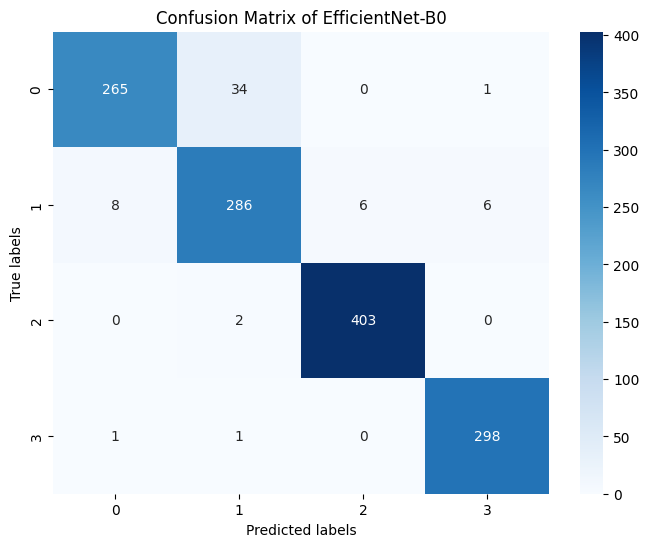

In [ ]:



# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of EfficientNet-B0')
plt.show()

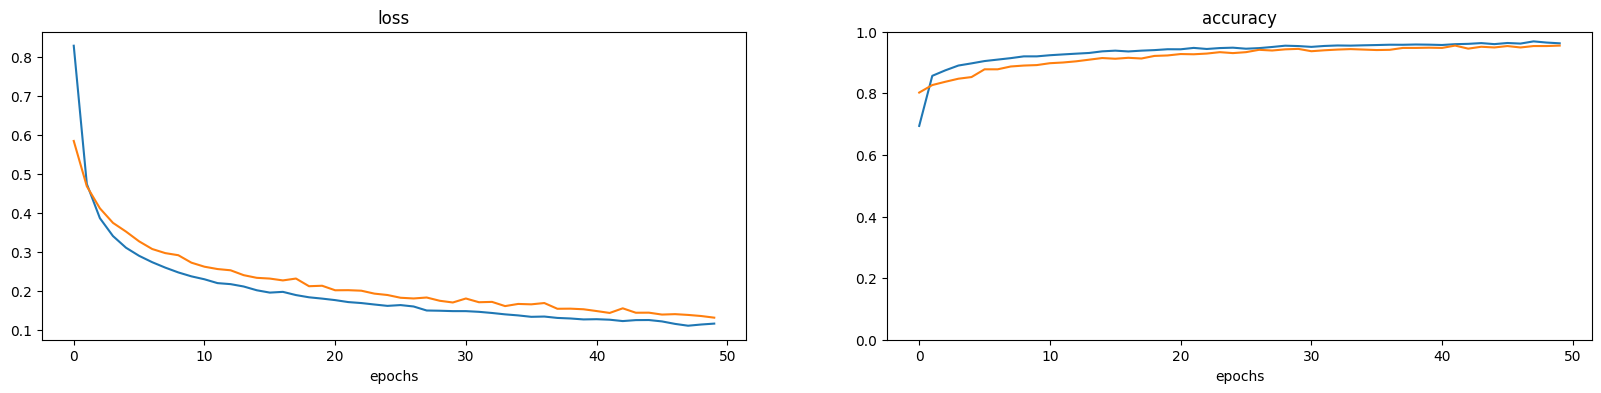

In [ ]:
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
ax.plot(history9.history["loss"])
ax.plot(history9.history["val_loss"])
ax.set_title("loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history9.history["accuracy"])
ax2.plot(history9.history["val_accuracy"])
ax2.set_title("accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
loss, accuracy = model_effnet.evaluate(X_test,to_categorical(test_encoded_labels, num_classes=num_classes), verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.1398123800754547
Test accuracy: 0.9488939642906189
